求解 摆的小角度振动方程 :      $$  \frac{d^2\theta}{dt^2}  + \omega_0^2\theta = 0  $$



画出其相图($\mathop{\theta}\limits^{.},\theta$):


$$\frac{1}{2} {\mathop{\theta}\limits^{.}}^2+ \frac{\omega_0^2}{2} \theta ^2=  E $$

导入库


In [36]:
import mycentpy
import numpy as np
import matplotlib.pyplot as plt

引入参数
    $$ \omega_0 = 1 $$
    $$  \theta(t=0) = 0 $$ 
    $$\frac{d\theta}{dt} (t=0) = 1.23$$

写成矩阵的形式

$$ \frac{d}{dt}\left[\begin{array}{lll}
        \theta \\
         \Theta
         \end{array}\right]   +  \left[\begin{array}{l1}
                             -\Theta \\
                             \omega_0^2\theta
                             \end{array}\right] = 0$$

其中：$$ \Theta = \frac{d\theta}{dt}$$

计算 5 秒内的情况 ，以dt = 0.05作为时间步长


In [42]:
pars = mycentpy.Pars1d(t_final = 10.0,dt_out=0.01,scheme ='fwd')

定义 求解函数


In [43]:
class swag(mycentpy.Equation1d):
    def initial_data(self):
        u = np.zeros((1,2))
        u[0,0] =  0
        u[0,1] = -0.5
        return u
    
    def flux_x(self,u):
        f= np.zeros_like(u)
        theta1 = u[:,0]
        theta2 = u[:,1]
        
        f[:,0] = theta1
        f[:,1] = theta2
        
        return f
    
    
    def actavite(self,u,t):
        a = np.zeros_like(u)
        omega = 1
        theta1 = u[:,0]
        theta2 = u[:,1]
        
        a[0,:] = -1*theta2
        a[:,1] = omega**2 * theta1
        
        return a 
    
    

In [44]:
eqn = swag(pars)
soln = mycentpy.Solver1d(eqn)
soln.solve()

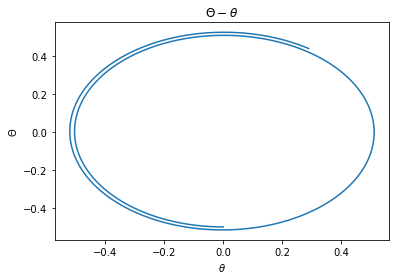

In [45]:
plt.plot(soln.u_n[:,0,0],soln.u_n[:,0,1])
plt.title(r"$\Theta - \theta$")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\Theta$')
plt.show()

Text(0, 0.5, '$\\theta$')

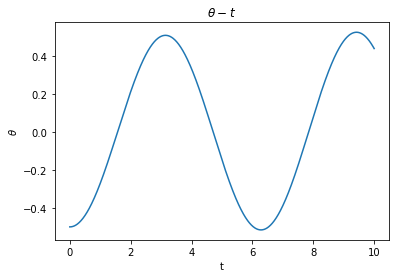

In [46]:
plt.plot(np.linspace(0,pars.t_final,soln.u_n.shape[0]),soln.u_n[:,0,1])
plt.title(r"$\theta - t$")
plt.xlabel(r't')
plt.ylabel(r'$\theta$')